In [10]:
import requests
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
from wordcloud import WordCloud



In [11]:
# creating an empty review list and storing reviews which was scraped using beautifulsoup.

for i in range(1,20):
    led_reviews = []
    ip = []
    url = "https://www.amazon.in/product-reviews/B07D3L8K15/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews#"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    led_reviews = led_reviews+ip

In [12]:
led_reviews

['\n\n  It has three lighting with 4 different intensities. My eyes are sensetive. It was one of my greatest buys!\n\n',
 '\n\n  Definitely worth your money if you want a modern table lamp with a long life and WiFi capabilities.\n\n',
 '\n\n  Received Table Lamp on time and in very good packing . This is my first entry to wireless electrical appliances and quite thrilled by the experience. Though there is starting issues like how to carry out Master reset , what is the MAC address of the device. But any way sorted out.\n\n',
 "\n\n  It's so perfect. Very handy. Loving it.\n\n",
 '\n\n  pretty bright and well made. Build quality is amazing. App is a bit stupid but may get better with time.\n\n',
 '\n\n  Good One\n\n',
 '\n\n  The product is really nice . The design is worth mentioning. You can have different kind of light as mentioned on the product and the touch is really feather touch. Worth buying this product.\n\n',
 '\n\n  Perfect product to gift\n\n',
 '\n\n  Very nice product sup

In [13]:
# writing reviews to a file
with open("reviews_file.txt", "w") as output:
    output.write(str(led_reviews))

In [69]:
## Joining all the reviews into single paragraph
red_rev_string = " ".join(led_reviews)

In [70]:
red_rev_string

"\n\n  It has three lighting with 4 different intensities. My eyes are sensetive. It was one of my greatest buys!\n\n \n\n  Definitely worth your money if you want a modern table lamp with a long life and WiFi capabilities.\n\n \n\n  Received Table Lamp on time and in very good packing . This is my first entry to wireless electrical appliances and quite thrilled by the experience. Though there is starting issues like how to carry out Master reset , what is the MAC address of the device. But any way sorted out.\n\n \n\n  It's so perfect. Very handy. Loving it.\n\n \n\n  pretty bright and well made. Build quality is amazing. App is a bit stupid but may get better with time.\n\n \n\n  Good One\n\n \n\n  The product is really nice . The design is worth mentioning. You can have different kind of light as mentioned on the product and the touch is really feather touch. Worth buying this product.\n\n \n\n  Perfect product to gift\n\n \n\n  Very nice product super brightness nice for reading an

In [71]:
# Removing unwanted symbols and converting all to lowercase
red_rev_string = re.sub("[^A-Z_a-z_0-9" "]+"," ",red_rev_string).lower()

In [72]:
red_rev_string

' it has three lighting with 4 different intensities my eyes are sensetive it was one of my greatest buys definitely worth your money if you want a modern table lamp with a long life and wifi capabilities received table lamp on time and in very good packing this is my first entry to wireless electrical appliances and quite thrilled by the experience though there is starting issues like how to carry out master reset what is the mac address of the device but any way sorted out it s so perfect very handy loving it pretty bright and well made build quality is amazing app is a bit stupid but may get better with time good one the product is really nice the design is worth mentioning you can have different kind of light as mentioned on the product and the touch is really feather touch worth buying this product perfect product to gift very nice product super brightness nice for reading and can be used as bed lamp also nice quality very flexible works with alexa the best '

In [73]:
#splitting each word with space.Tokenization
red_rev_words = red_rev_string.split(" ")

In [74]:
red_rev_words

['',
 'it',
 'has',
 'three',
 'lighting',
 'with',
 '4',
 'different',
 'intensities',
 'my',
 'eyes',
 'are',
 'sensetive',
 'it',
 'was',
 'one',
 'of',
 'my',
 'greatest',
 'buys',
 'definitely',
 'worth',
 'your',
 'money',
 'if',
 'you',
 'want',
 'a',
 'modern',
 'table',
 'lamp',
 'with',
 'a',
 'long',
 'life',
 'and',
 'wifi',
 'capabilities',
 'received',
 'table',
 'lamp',
 'on',
 'time',
 'and',
 'in',
 'very',
 'good',
 'packing',
 'this',
 'is',
 'my',
 'first',
 'entry',
 'to',
 'wireless',
 'electrical',
 'appliances',
 'and',
 'quite',
 'thrilled',
 'by',
 'the',
 'experience',
 'though',
 'there',
 'is',
 'starting',
 'issues',
 'like',
 'how',
 'to',
 'carry',
 'out',
 'master',
 'reset',
 'what',
 'is',
 'the',
 'mac',
 'address',
 'of',
 'the',
 'device',
 'but',
 'any',
 'way',
 'sorted',
 'out',
 'it',
 's',
 'so',
 'perfect',
 'very',
 'handy',
 'loving',
 'it',
 'pretty',
 'bright',
 'and',
 'well',
 'made',
 'build',
 'quality',
 'is',
 'amazing',
 'app',
 'i

In [75]:
# eleminating stopwords

import nltk
import os
os.getcwd()
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
red_rev_words = [word for word in red_rev_words if not word in stop_words]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/halders/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [76]:
red_rev_string

' it has three lighting with 4 different intensities my eyes are sensetive it was one of my greatest buys definitely worth your money if you want a modern table lamp with a long life and wifi capabilities received table lamp on time and in very good packing this is my first entry to wireless electrical appliances and quite thrilled by the experience though there is starting issues like how to carry out master reset what is the mac address of the device but any way sorted out it s so perfect very handy loving it pretty bright and well made build quality is amazing app is a bit stupid but may get better with time good one the product is really nice the design is worth mentioning you can have different kind of light as mentioned on the product and the touch is really feather touch worth buying this product perfect product to gift very nice product super brightness nice for reading and can be used as bed lamp also nice quality very flexible works with alexa the best '

In [77]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in red_rev_words]
print(stemmed_tokens[0:40])

['', 'three', 'light', '4', 'differ', 'intens', 'eye', 'senset', 'one', 'greatest', 'buy', 'definit', 'worth', 'money', 'want', 'modern', 'tabl', 'lamp', 'long', 'life', 'wifi', 'capabl', 'receiv', 'tabl', 'lamp', 'time', 'good', 'pack', 'first', 'entri', 'wireless', 'electr', 'applianc', 'quit', 'thrill', 'experi', 'though', 'start', 'issu', 'like']


In [78]:
## Joining all the reviews into single paragraph
stemmed_output =" ".join(stemmed_tokens)
stemmed_output

' three light 4 differ intens eye senset one greatest buy definit worth money want modern tabl lamp long life wifi capabl receiv tabl lamp time good pack first entri wireless electr applianc quit thrill experi though start issu like carri master reset mac address devic way sort perfect handi love pretti bright well made build qualiti amaz app bit stupid may get better time good one product realli nice design worth mention differ kind light mention product touch realli feather touch worth buy product perfect product gift nice product super bright nice read use bed lamp also nice qualiti flexibl work alexa best '

In [79]:
## Using lemmatization now

# NLP english language model of spacy library
nlp = spacy.load("en_core_web_sm")
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(red_rev_words))
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

[' ', 'three', 'lighting', '4', 'different', 'intensity', 'eye', 'sensetive', 'one', 'great', 'buy', 'definitely', 'worth', 'money', 'want', 'modern', 'table', 'lamp', 'long', 'life', 'wifi', 'capability', 'receive', 'table', 'lamp']


In [81]:
lemma_output =" ".join(lemmas)
lemma_output

'  three lighting 4 different intensity eye sensetive one great buy definitely worth money want modern table lamp long life wifi capability receive table lamp time good packing first entry wireless electrical appliance quite thrilled experience though start issue like carry master reset mac address device way sort perfect handy love pretty bright well make build quality amazing app bit stupid may get well time good one product really nice design worth mention different kind light mention product touch really feather touch worth buy product perfect product gift nice product super brightness nice reading use bed lamp also nice quality flexible work alexa good'

## Feature extraction

In [82]:
from sklearn.feature_extraction.text import CountVectorizer

In [83]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)
print(vectorizer.vocabulary_)

{'three': 66, 'lighting': 36, 'different': 17, 'intensity': 30, 'eye': 21, 'sensetive': 59, 'one': 48, 'great': 28, 'buy': 11, 'definitely': 14, 'worth': 77, 'money': 46, 'want': 71, 'modern': 45, 'table': 64, 'lamp': 33, 'long': 38, 'life': 34, 'wifi': 74, 'capability': 12, 'receive': 57, 'time': 68, 'good': 27, 'packing': 49, 'first': 23, 'entry': 19, 'wireless': 75, 'electrical': 18, 'appliance': 5, 'quite': 54, 'thrilled': 67, 'experience': 20, 'though': 65, 'start': 61, 'issue': 31, 'like': 37, 'carry': 13, 'master': 42, 'reset': 58, 'mac': 40, 'address': 0, 'device': 16, 'way': 72, 'sort': 60, 'perfect': 50, 'handy': 29, 'love': 39, 'pretty': 51, 'bright': 8, 'well': 73, 'make': 41, 'build': 10, 'quality': 53, 'amazing': 3, 'app': 4, 'bit': 7, 'stupid': 62, 'may': 43, 'get': 25, 'product': 52, 'really': 56, 'nice': 47, 'design': 15, 'mention': 44, 'kind': 32, 'light': 35, 'touch': 69, 'feather': 22, 'gift': 26, 'super': 63, 'brightness': 9, 'reading': 55, 'use': 70, 'bed': 6, 'al

#### TFidf Vectorizer 

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(led_reviews)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['address', 'address of', 'address of the', 'alexa', 'alexa the', 'alexa the best', 'also', 'also nice', 'also nice quality', 'amazing', 'amazing app', 'amazing app is', 'and', 'and can', 'and can be', 'and in', 'and in very', 'and quite', 'and quite thrilled', 'and the', 'and the touch', 'and well', 'and well made', 'and wifi', 'and wifi capabilities', 'any', 'any way', 'any way sorted', 'app', 'app is', 'app is bit', 'appliances', 'appliances and', 'appliances and quite', 'are', 'are sensetive', 'are sensetive it', 'as', 'as bed', 'as bed lamp', 'as mentioned', 'as mentioned on', 'be', 'be used', 'be used as', 'bed', 'bed lamp', 'bed lamp also', 'best', 'better', 'better with', 'better with time', 'bit', 'bit stupid', 'bit stupid but', 'bright', 'bright and', 'bright and well', 'brightness', 'brightness nice', 'brightness nice for', 'build', 'build quality', 'build quality is', 'but', 'but any', 'but any way', 'but may', 'but may get', 'buying', 'buying this', 'buying this product', 

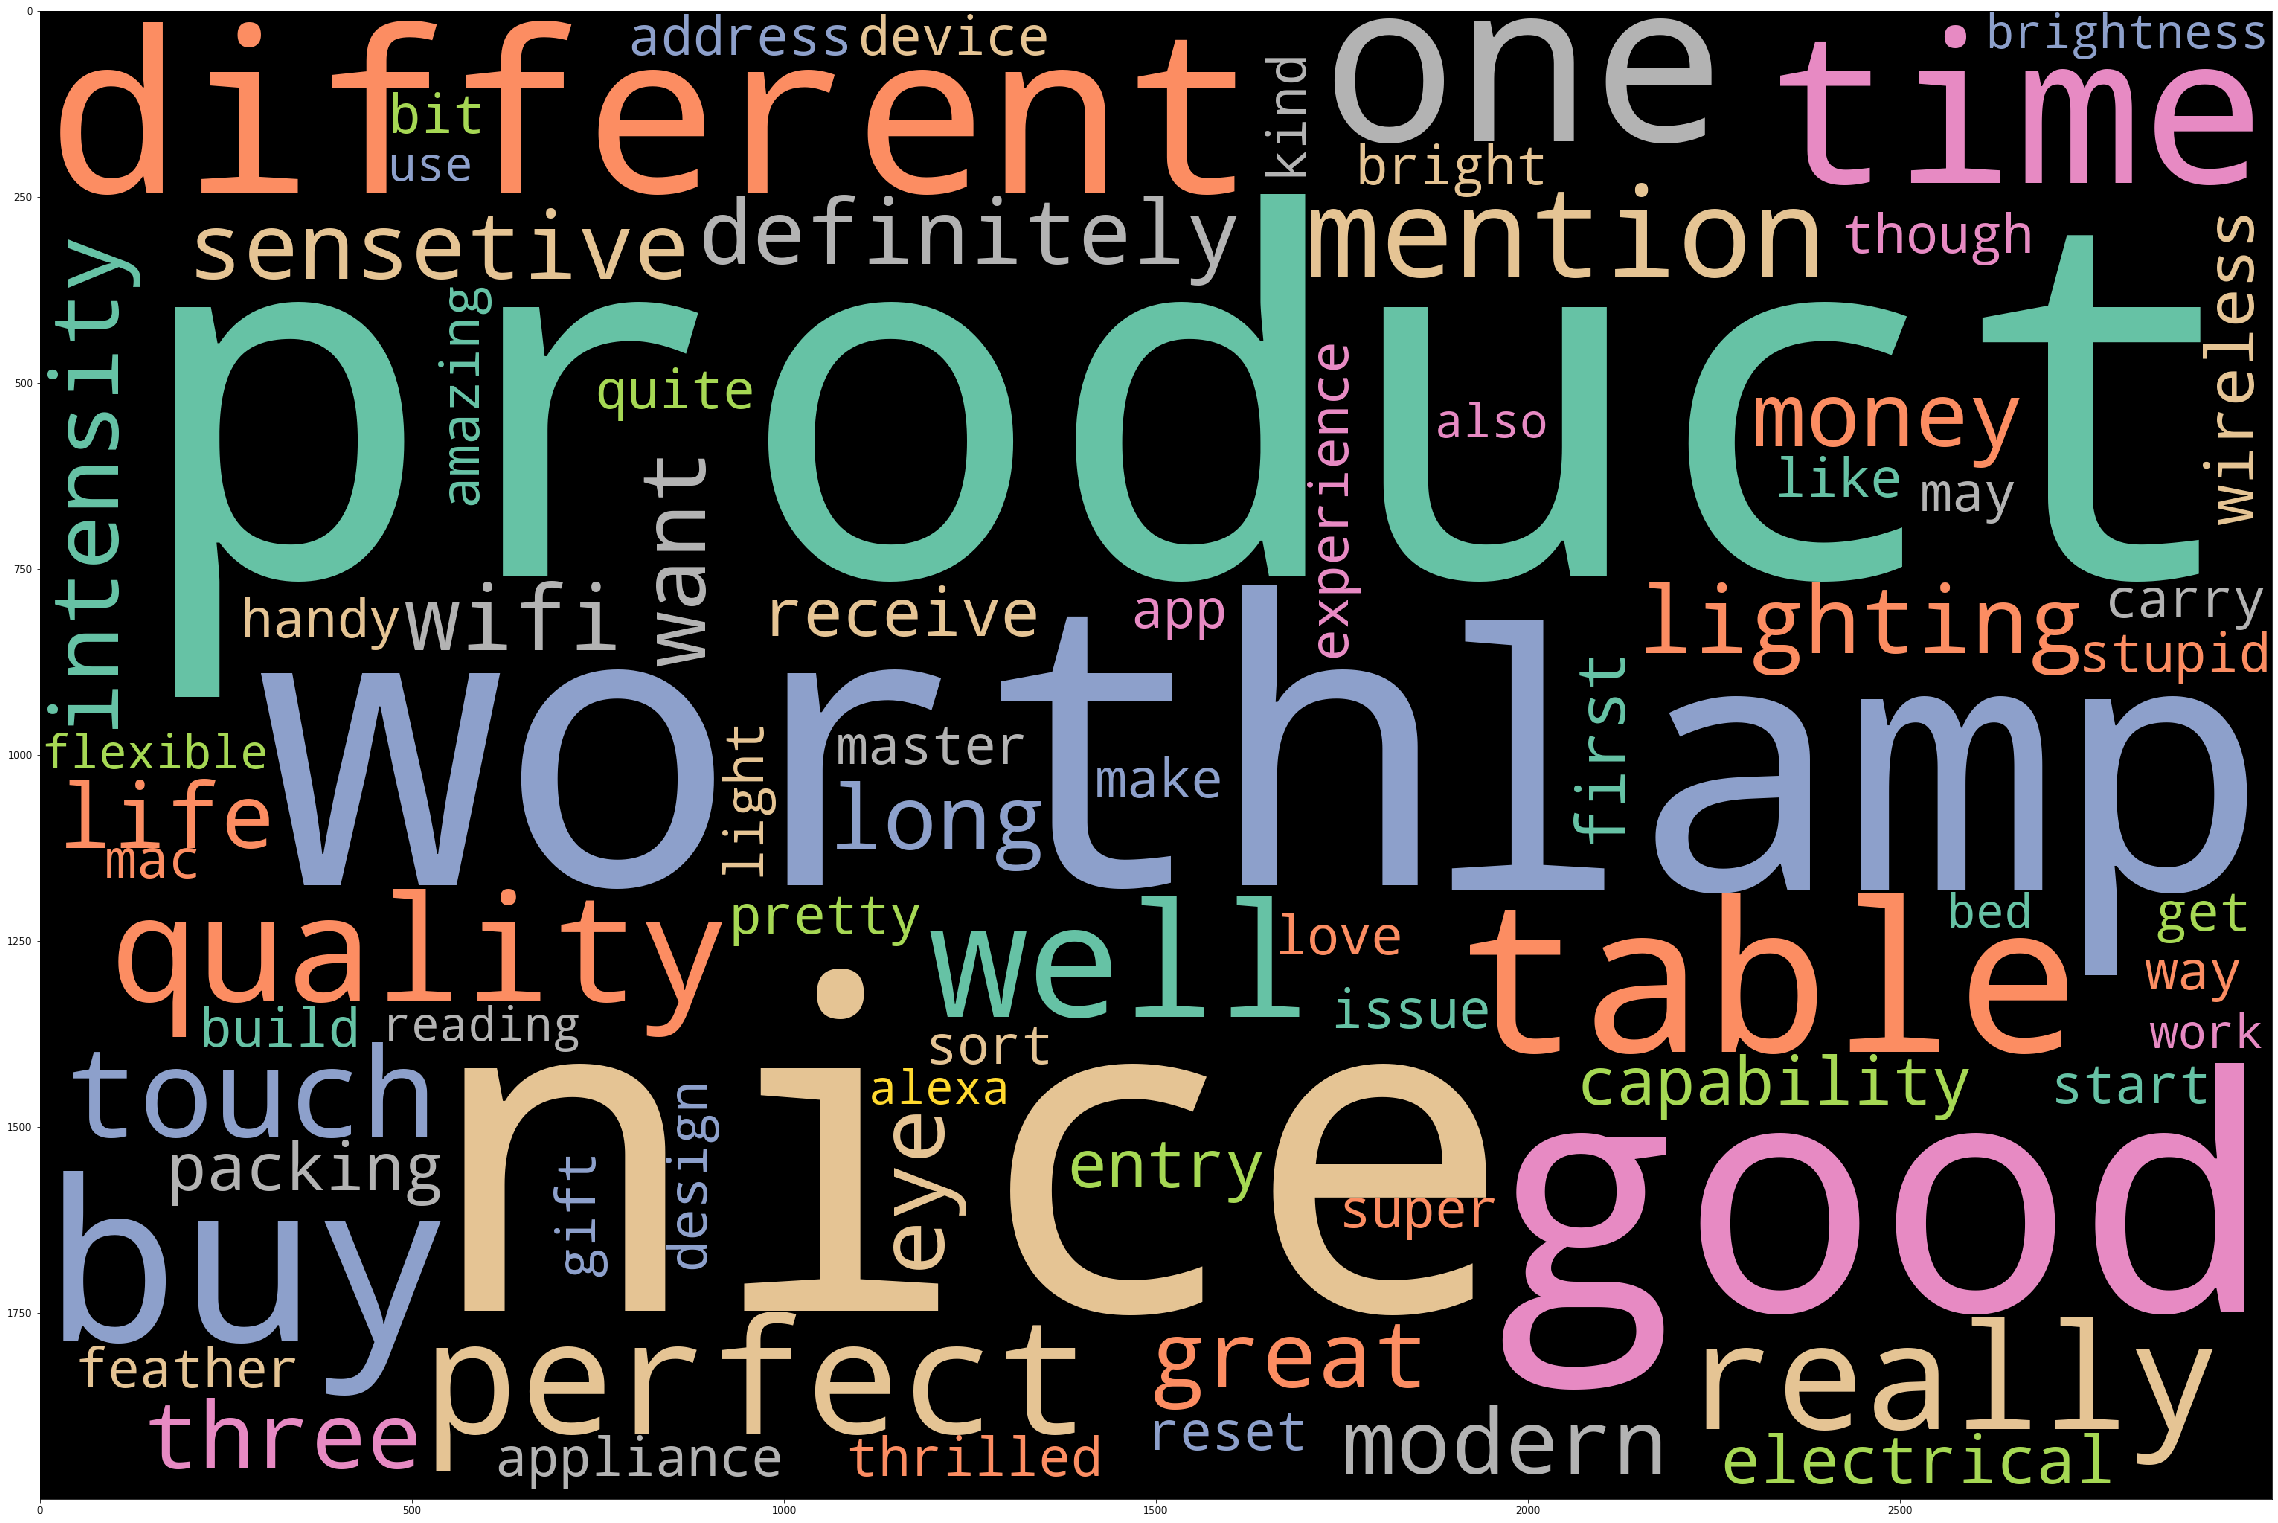

In [96]:
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stop_words).generate(lemma_output)
# Plot
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)

## Filtering out positive and negative emotions

In [97]:
# positive words # Choose the path for +ve words stored in system
with open("positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")

poswords = poswords[36:]

In [101]:
# negative words  Choose path for -ve words stored in system
with open("negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")
  
negwords =negwords[36:]

In [105]:
red_neg= ' '.join([w for w in lemmas if w in negwords])
red_pos = ' '.join([w for w in lemmas if w in poswords])

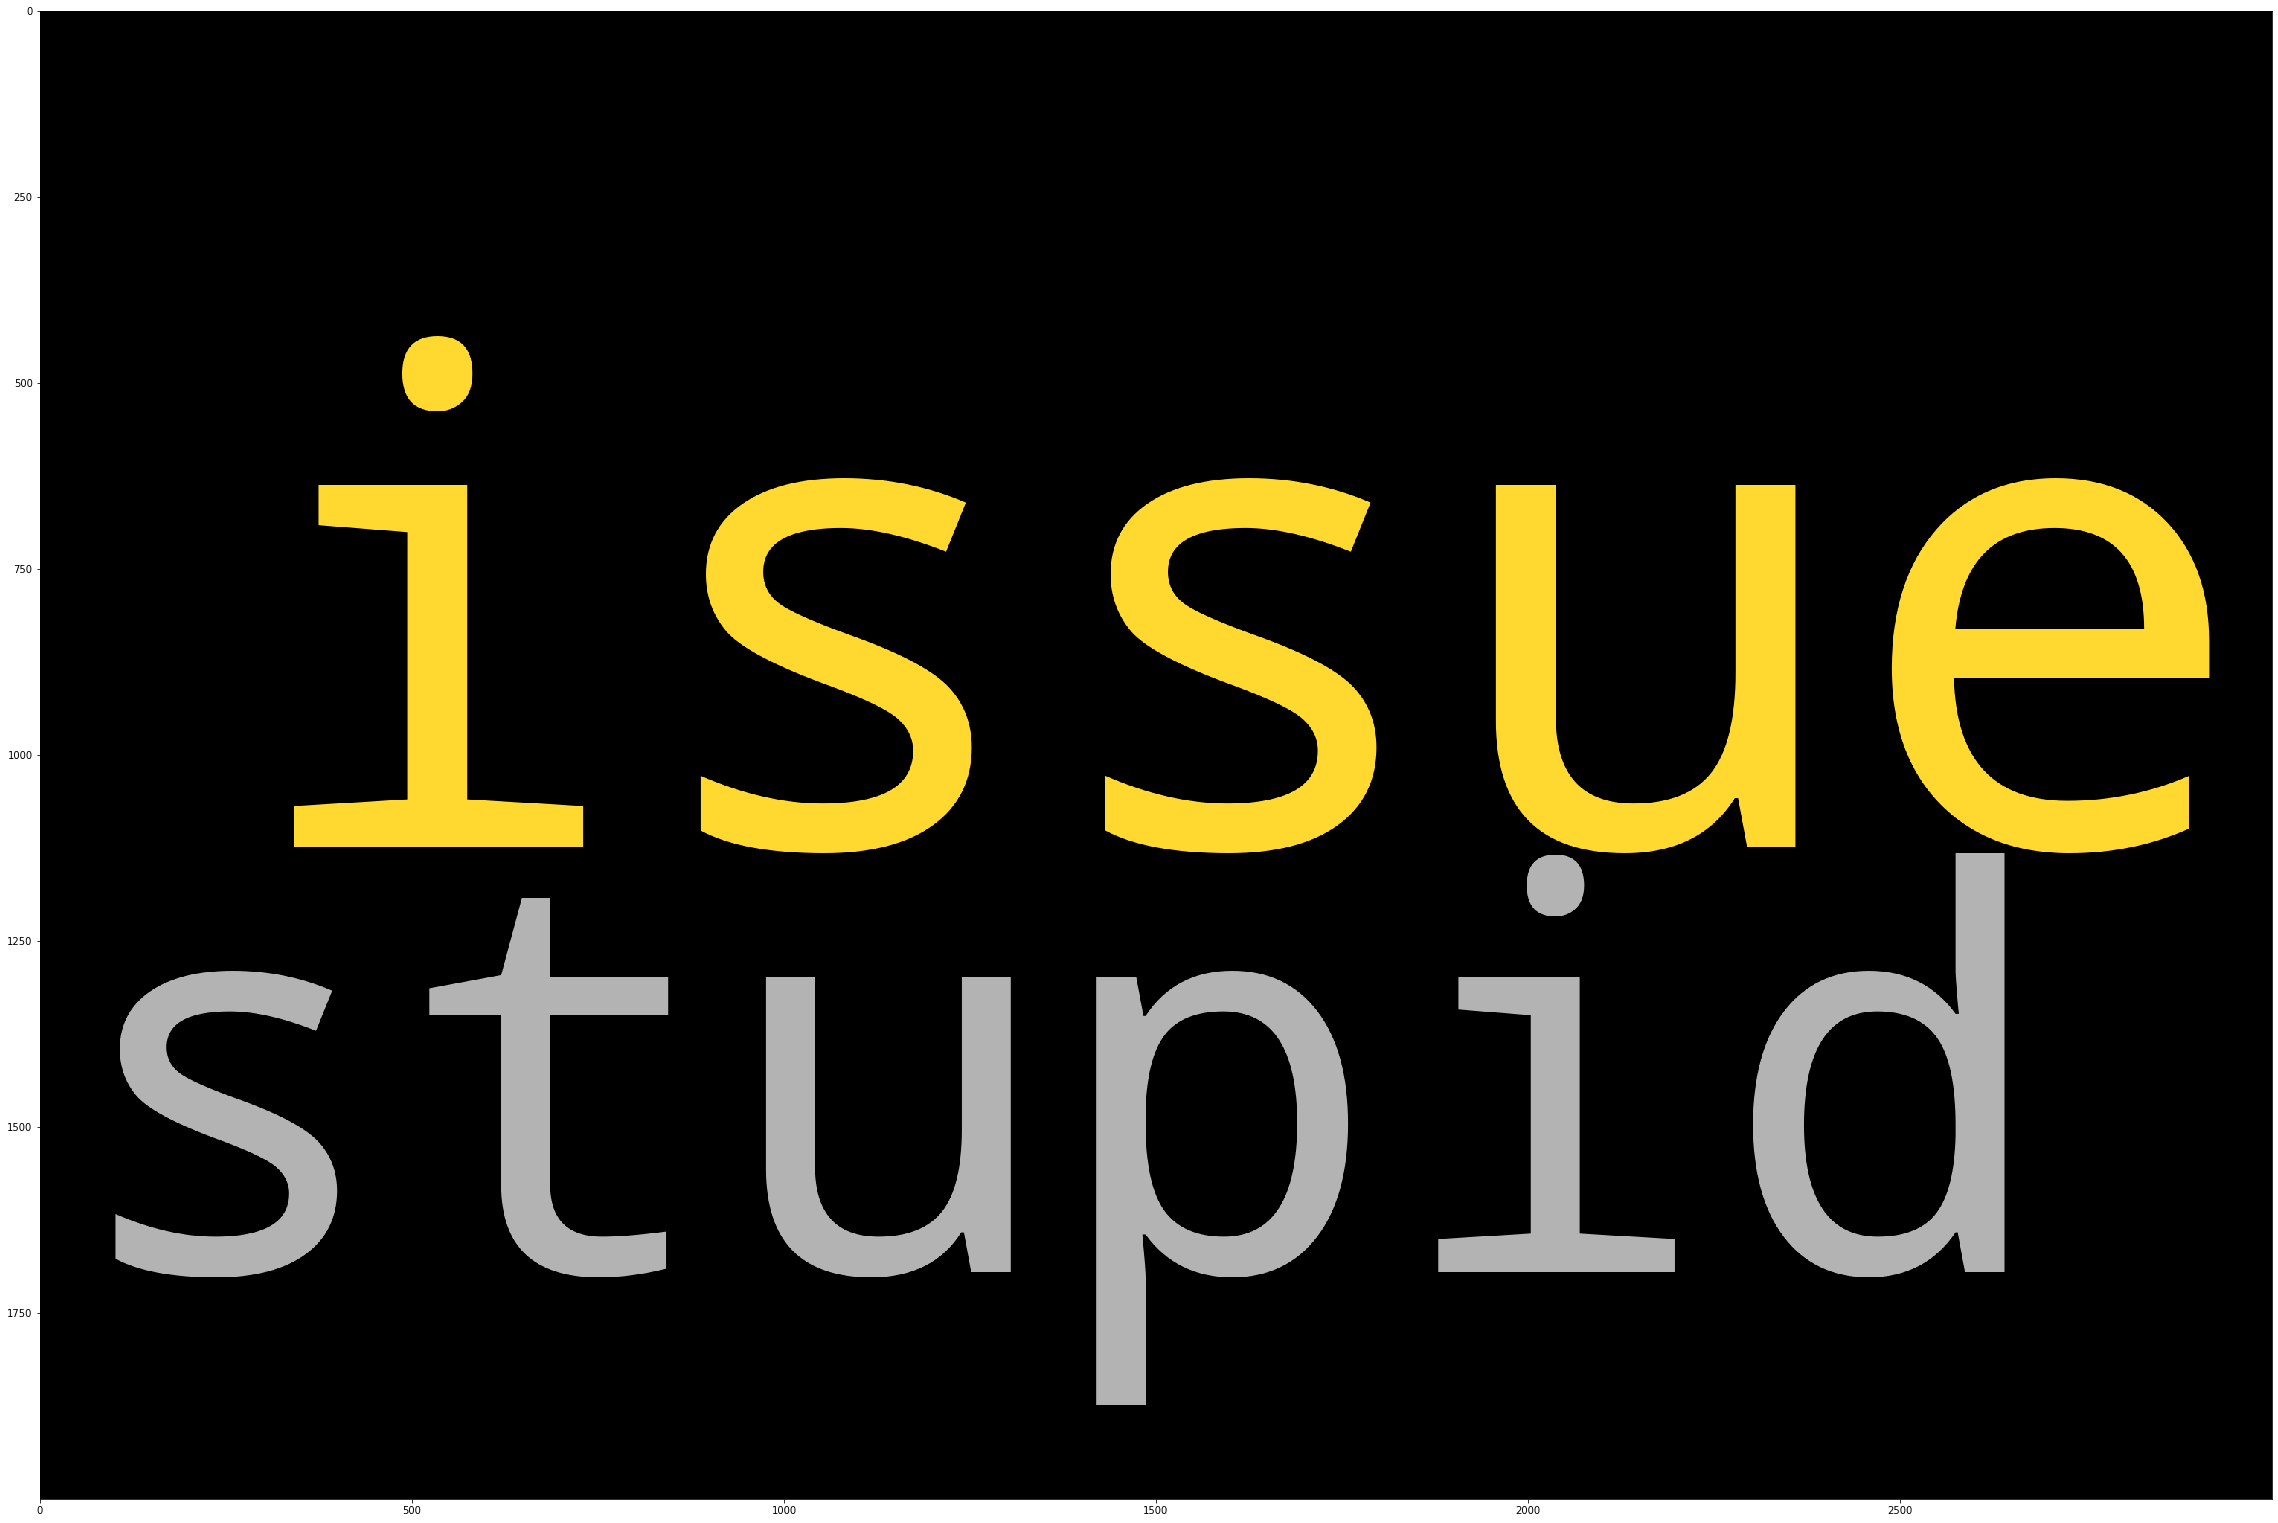

In [106]:
wordcloud_negative = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stop_words).generate(red_neg)
# Plot
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud_negative)

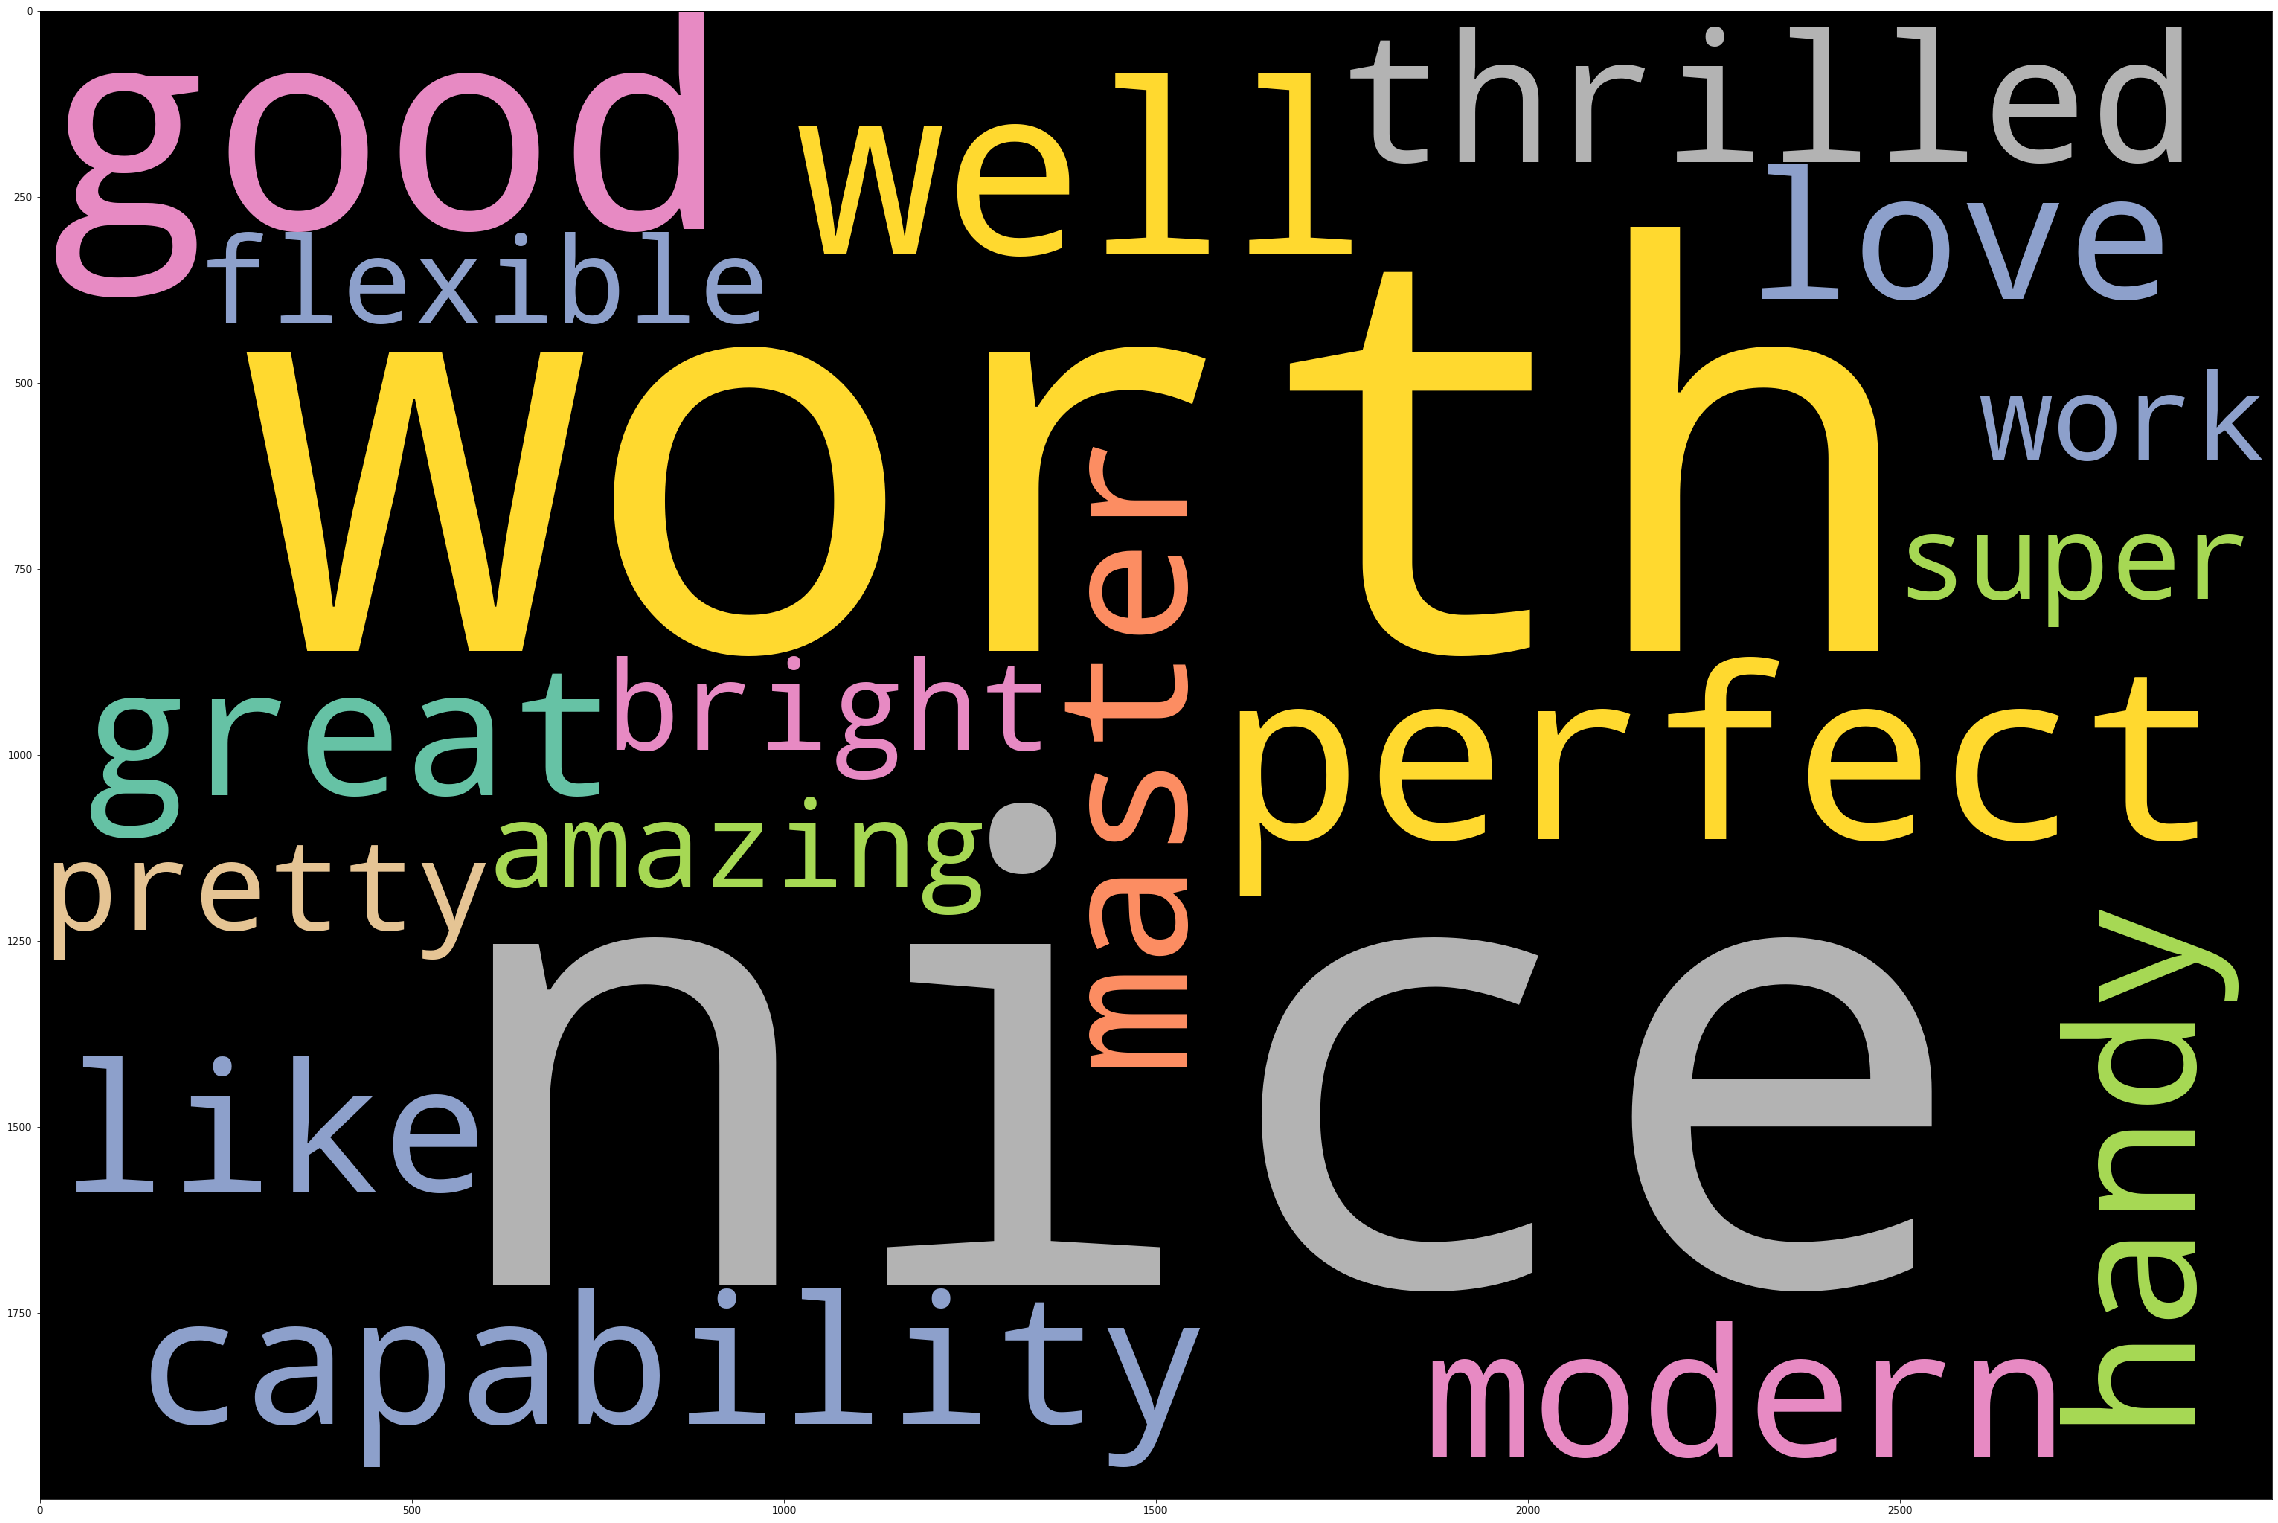

In [108]:
wordcloud_positive = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stop_words).generate(red_pos)
# Plot
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud_positive)